In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

fn="../data/gridCellData.pickle" # name of our data file


with open(fn, "rb") as myFile: # with statement, will close the file automatically when we are done
    myData = pickle.load(myFile)

In [24]:
print(type(myData))

<class 'dict'>


This is a dictionary. You can have a look at the keys in the dictionary with the `keys()` method.

In [25]:
myData.keys()

dict_keys(['spike_trains', 'position'])

myData contains a `spike_trains` and `position`.

In [26]:
myData["spike_trains"]

[array([1.76150000e-01, 1.17540000e+00, 2.87110000e+00, ...,
        1.24176155e+03, 1.24297930e+03, 1.24310075e+03]),
 array([8.34000000e-02, 2.13350000e-01, 3.34850000e-01, ...,
        1.24281570e+03, 1.24290600e+03, 1.24299165e+03]),
 array([   2.0036 ,    3.85695,    4.10675, ..., 1243.3503 , 1243.3593 ,
        1243.3636 ]),
 array([7.83250000e-01, 8.52250000e-01, 8.66450000e-01, ...,
        1.23960960e+03, 1.24111530e+03, 1.24325105e+03]),
 array([4.76000000e-02, 1.71100000e-01, 3.08350000e-01, ...,
        1.24331005e+03, 1.24331295e+03, 1.24334460e+03])]

Text(0.5, 0, 'Time (sec)')

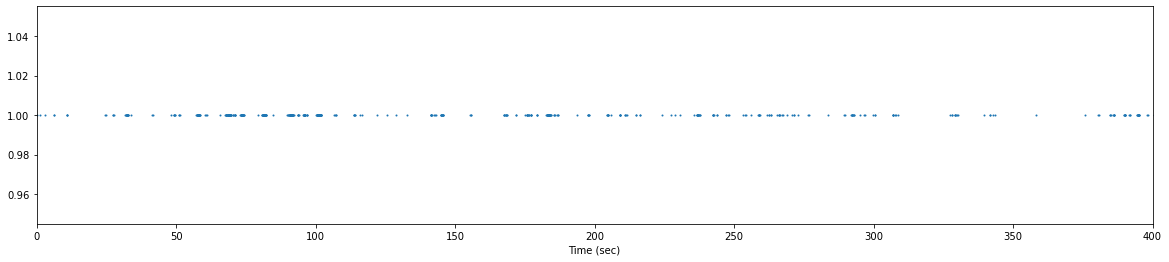

In [39]:
st = myData["spike_trains"][0]
plt.figure(figsize=(20,4))
plt.scatter(st,np.ones_like(st),s=1)
plt.xlim(0,400)
plt.xlabel("Time (sec)")

In [27]:
myData["position"]

{'time': array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 1.24332e+03,
        1.24334e+03, 1.24336e+03]),
 'x': array([nan, nan, nan, ..., nan, nan, nan]),
 'y': array([nan, nan, nan, ..., nan, nan, nan])}

In [28]:
p = myData["position"]
p

{'time': array([0.00000e+00, 2.00000e-02, 4.00000e-02, ..., 1.24332e+03,
        1.24334e+03, 1.24336e+03]),
 'x': array([nan, nan, nan, ..., nan, nan, nan]),
 'y': array([nan, nan, nan, ..., nan, nan, nan])}

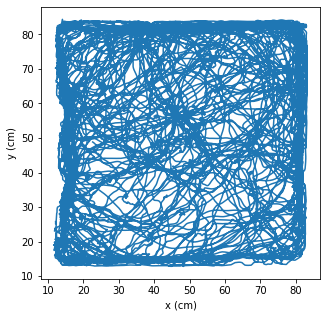

In [29]:
plt.figure(figsize=(5,5))
plt.plot(p["x"],p["y"])
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.show()

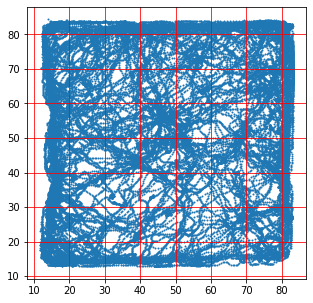

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(p["x"],p["y"],s=1)
plt.grid(c="red",zorder=3)
